**NKI Breast Cancer Data**

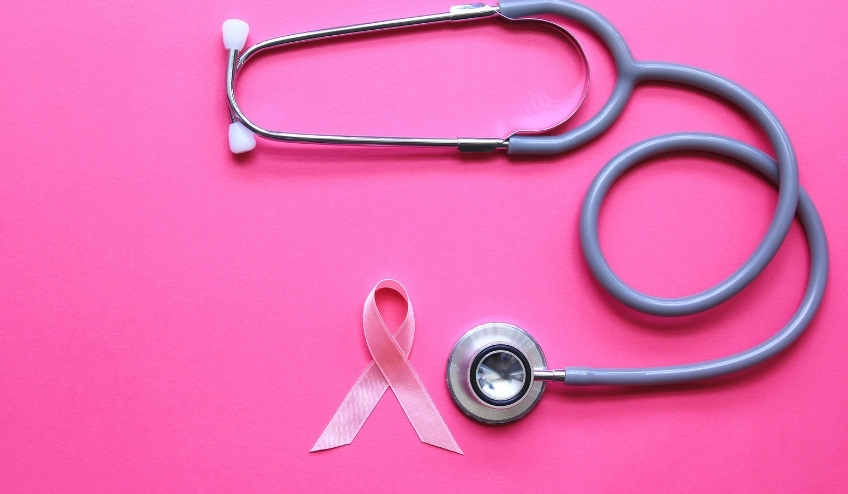

Le jeu de données ["NKI Breast Cancer Data"](https://data.world/deviramanan2016/nki-breast-cancer-data) contient 272 lignes qui présentent les  patientes atteintes d'un cancer du sein et 1570 colonnes.

Les 20 premiers colonnes présentents des informations sur l'état du patient et 1550 colonnes qui restent présent l'expression des gènes qui sont responsables à apparition du cancer de sein .











Dans cette deuxième partie du travail sur Spark , nous avons choisi de créer un modèle de regression logistique en utilisant les 20 pemiers colonnes et en considérant "eventdeath" comme notre target .

# **Les étapes de l'installation de Spark sur notre notebook dans Google Colab**

In [ ]:
!pwd
!ls
!python --version

/content
sample_data
Python 3.7.12


**Installation Java :**

Spark est écrit dans le langage de programmation Scala et nécessite l'exécution de la machine virtuelle Java (JVM). Par conséquent, notre première tâche consiste à télécharger Java.

In [ ]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!java --version

openjdk 11.0.11 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


**Installation Apache Spark :**

Ensuite, nous allons installer Apache Spark 3.0.0 avec Hadoop 2.7.

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar -xvzf spark-3.0.0-bin-hadoop2.7.tgz #d écompresser le dossier installé
!pip install findspark # la bibliothèque findspark localisera Spark sur le système et l'importera en tant que bibliothèque standard

--2021-12-28 18:32:50--  https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220272364 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.0-bin-hadoop2.7.tgz.1’

spark-3.0.0-bin-had 100%[===================>] 210.07M  11.0MB/s    in 21s     

2021-12-28 18:33:12 (10.0 MB/s) - ‘spark-3.0.0-bin-hadoop2.7.tgz.1’ saved [220272364/220272364]

spark-3.0.0-bin-hadoop2.7/
spark-3.0.0-bin-hadoop2.7/NOTICE
spark-3.0.0-bin-hadoop2.7/kubernetes/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.0-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.0-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.0-bin-hado

**Définir les vaiables d'environnement :**

Aprés l'installation de  toutes les dépendances nécessaires dans Colab, il est temps de définir le chemin de l'environnement. Cela nous permettra d'exécuter Pyspark dans l'environnement Colab.

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

**Vérification :**

Nous devons localiser Spark dans le système. Pour cela, nous importons findspark et utilisons la méthode findspark.init().

In [ ]:
import findspark
findspark.init()

**Initialiser la session PySpark :**

Maintenant, tout est prêt pour PySpark. Ensuite, vous devez initialiser la session PySpark avant de coder.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Afficher la variable "spak" :

In [ ]:
spark

# **Chargement des données dans PySpark**

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Create DataFrame from CSV File in PySpark 3.0").getOrCreate()
print(spark.sparkContext.appName)

Colab


In [ ]:
ccsv_file_path = "/content/NKI_cleaned.csv"

df = spark.read.csv(path=ccsv_file_path, sep=",", header=True)

df.show()

df.printSchema()

+-------+---+---+----------+---------+--------------+-----+--------+----------+--------+----+--------+-----+--------+----------+-------+--------------------+---------+--------------+--------------+---------+---------+--------------+--------------+--------------+-----------+--------------+--------------+--------------+---------+---------+--------------+--------------+---------+---------+---------+--------------+--------------+--------------+----------+--------------+-------------------+--------------+--------------+--------------+---------+---------+---------+---------+---------+----------+--------------+--------------+---------+--------------+--------------------+--------------+--------------+---------+--------------+---------+---------+--------------+--------------+---------+--------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+---------+---------+---------+---------+---------+-------------------+---------+-------

**Supprimer les valeurs manquantes:** 

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+-------+---+---+----------+--------+--------------+-----+--------+----------+--------+----+--------+-----+--------+----------+-------+----+---------+--------------+--------------+------+------+--------------+--------------+--------------+-----------+--------------+--------------+--------------+--------+--------+--------------+--------------+------+--------+--------+--------------+--------------+--------------+----------+--------------+--------------+--------------+--------------+--------------+--------+------+------+--------+---------+----------+--------------+--------------+------+--------------+---------+--------------+--------------+---------+--------------+---------+---------+--------------+--------------+---------+--------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+---------+---------+---------+---------+---------+---------+---------+--------------+---------+---------+---------+---------+---------+---------+-----

Il n'existe pas des valeurs manquantes sur notre jeu de données 

**Exploration des données :**

In [ ]:
df.describe().show() # afficher une description statistique associée à chaque colonne

+-------+-------+------------------+-----------------+-------------------+-----------------+-----------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-

In [ ]:
df.select("grade").distinct().show() # afficher les différents valeurs qui existent pour la variable "grade" ( Grade histologique (Intermédiaire, faiblement ou bien différencié))

+-----+
|grade|
+-----+
|    3|
|    1|
|    2|
+-----+



la fonction  **groupBy()**  de PySpark est utilisée pour collecter les données identiques en groupes et exécuter des fonctions d'agrégation sur les données regroupées.

In [ ]:
from pyspark.sql import functions as F
df.groupBy("eventdeath").agg(F.sum("diam")).show() # ici nous avons regrouper les données de la colonnes "diam"(Diamètre de la tumeur primitive) en fonction de "eventhdeath" puis nous avons 
                                                   #  puis nous avons effectué la somme sur les données regroupées

+----------+---------+
|eventdeath|sum(diam)|
+----------+---------+
|         0|   4164.0|
|         1|   1964.0|
+----------+---------+



#**Le modèle du régression logistique**

**Pré-traitement des données**

In [ ]:
df2=df
cls = df2.columns[2:15]
df_clf =df2.select(cls).show(10)

+---+----------+---------+--------------+-----+--------+----------+--------+----+--------+-----+--------+----------+
|age|eventdeath| survival|timerecurrence|chemo|hormonal|amputation|histtype|diam|posnodes|grade|angioinv|lymphinfil|
+---+----------+---------+--------------+-----+--------+----------+--------+----+--------+-----+--------+----------+
| 43|         0|14.817248|     14.817248|    0|       0|         1|       1|  25|       0|    2|       3|         1|
| 48|         0|14.261465|     14.261465|    0|       0|         0|       1|  20|       0|    3|       3|         1|
| 38|         0| 6.644764|      6.644764|    0|       0|         0|       1|  15|       0|    2|       1|         1|
| 50|         0| 7.748118|      7.748118|    0|       1|         0|       1|  15|       1|    2|       3|         1|
| 38|         0| 6.436687|       6.31896|    0|       0|         1|       1|  15|       0|    2|       2|         1|
| 42|         0| 5.037645|      2.743326|    1|       0|        

Nous devons convertir les variables de notre modèle de String à Integer 

In [ ]:
from pyspark.sql.types import IntegerType
for i in cls:
  df2 = df2.withColumn(i, df2[i].cast(IntegerType()))

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

Dans PySpark, toutes les colonnes, à l'exception de la cible, doivent être converties en vecteur, que nous appelons "features".

In [ ]:
assembler = VectorAssembler(inputCols=["age","survival","timerecurrence","chemo","hormonal","amputation","histtype","diam","posnodes","angioinv","lymphinfil"], 
outputCol="feautures")

In [ ]:
output=assembler.transform(df2)

In [ ]:
output.show(10)

+-------+---+---+----------+--------+--------------+-----+--------+----------+--------+----+--------+-----+--------+----------+-------+----+---------+--------------+--------------+------+------+--------------+--------------+--------------+-----------+--------------+--------------+--------------+--------+--------+--------------+--------------+------+--------+--------+--------------+--------------+--------------+----------+--------------+--------------+--------------+--------------+--------------+--------+------+------+--------+---------+----------+--------------+--------------+------+--------------+---------+--------------+--------------+---------+--------------+---------+---------+--------------+--------------+---------+--------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+---------+---------+---------+---------+---------+---------+---------+--------------+---------+---------+---------+---------+---------+---------+-----

Pour entraîner notre modèle, nous combinons « feautures  » et « eventdeath » comme input/output.

In [ ]:
final_data = output.select("feautures","eventdeath")

**Split final_data :**

Nous pouvons diviser "final_data" pour entraîner et tester comme suit : 70% de data pour training et 30% pour test

In [ ]:
train, test = final_data.randomSplit([0.7, 0.3])

**Model :**

LogisticRegression est utilisé comme méthode de classification, et labelCol doit être désigné comme l'entité cible, et featuresCol sont des entités définies, qui sont déjà représentées sous forme de vecteurs.

In [ ]:
lr = LogisticRegression(labelCol ="eventdeath", featuresCol ="feautures")

Dans cette étape, nous allons entraîner notre modele, qui est très similaire à  [scikit](https://scikit-learn.org/stable/), et voir ce qui est prédit en sortie pour notre cas de test.

In [ ]:
model=lr.fit(train)
predict_train = model.transform(train)
predict_test  = model.transform(test)
predict_test.select("eventdeath", "prediction").show(10)

+----------+----------+
|eventdeath|prediction|
+----------+----------+
|         1|       1.0|
|         0|       1.0|
|         0|       0.0|
|         1|       0.0|
|         1|       1.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
|         0|       0.0|
+----------+----------+
only showing top 10 rows



**Evaluation du modèle :**

Nous pouvons utiliser  [BinaryClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.BinaryClassificationEvaluator.html) pour évaluer notre modèle.La métrique par défaut pour le BinaryClassificationEvaluator est [areaUnderROC ](https://spark.apache.org/docs/2.3.2/api/java/org/apache/spark/ml/classification/BinaryLogisticRegressionSummary.html).

ROC est une courbe de probabilité et AUC représente le degré ou la mesure de séparabilité. ROC indique à quel point le modèle est capable de faire la distinction entre les classes.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol ='rawPrediction', labelCol ="eventdeath")
predict_test.select("eventdeath", "rawPrediction", "prediction", "probability").show(5)

+----------+--------------------+----------+--------------------+
|eventdeath|       rawPrediction|prediction|         probability|
+----------+--------------------+----------+--------------------+
|         1|[-2.7489248939969...|       1.0|[0.06014739684815...|
|         0|[-1.3714239077697...|       1.0|[0.20238989012128...|
|         0|[0.13712931549987...|       0.0|[0.53422870801123...|
|         1|[0.62086616726586...|       0.0|[0.65041551915453...|
|         1|[-2.9031403454412...|       1.0|[0.05199854274239...|
+----------+--------------------+----------+--------------------+
only showing top 5 rows



In [ ]:
print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))

print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set is 0.9146546883773163
The area under ROC for test set is 0.9331034482758621


**Réglage des paramètres**

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])# regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])# Elastic Net Parameter (Ridge = 0)
             .addGrid(lr.maxIter, [1, 5, 10])#Number of iterations
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)

In [ ]:
## Evaluate Best Model
predictions = cvModel.transform(test)
print('Best Model Test Area Under ROC', evaluator.evaluate(predictions))

Best Model Test Area Under ROC 0.9410344827586207


Nous remarquons que le score de test Area Under ROC est amélioré aprés le réglage des paramètres 

**Remarque :**

Comme vous remarquez , nous n'avons pas utilisé les 1550 gènes dans notre modèle de régression puisqu'ils sont de grande taille et difficile de distinguer les gènes pertinents qui contribuent plus dans notre prédictions .Mais nous pouvons les utiliser pour créer des clusters de patients par exemple en utilisant un modèle de réseau de neurones profond ([Distributed Deep Learning Pipelines with PySpark and Keras](https://towardsdatascience.com/distributed-deep-learning-pipelines-with-pyspark-and-keras-a3a1c22b9239) ).Nous pouvons premièrement utiliser un auto-encoder qui est dédié pour faire la réduction de la dimension puis  nous visualisons les données réduites  en utilisant t-sne ou UMAP .